In [1]:
from j_help import *

In [2]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries

df = json_helper('data/daily_summaries/')

data/daily_summaries/daily_summaries_FIPS10003_jan_2018_1.json
data/daily_summaries/daily_summaries_FIPS10003_jan_2018_0.json


/Users/chris/pyprojects/NotebooksWeek7/NOAADailySummaries/j_help.py:18: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_df = pd.read_json(new_json_contents)
/Users/chris/pyprojects/NotebooksWeek7/NOAADailySummaries/j_help.py:18: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_df = pd.read_json(new_json_contents)


In [3]:
# display a summary of df_daily_summaries
df.tail()

,date,datatype,station,attributes,value,source
1484,2018-12-21,RHAV,GHCND:USW00013781,",,W,",99,daily_summaries_FIPS10003_jan_2018_0.json
1485,2018-12-21,RHMN,GHCND:USW00013781,",,W,",93,daily_summaries_FIPS10003_jan_2018_0.json
1486,2018-12-21,RHMX,GHCND:USW00013781,",,W,",100,daily_summaries_FIPS10003_jan_2018_0.json
1487,2018-12-21,SNOW,GHCND:USW00013781,",,W,",0,daily_summaries_FIPS10003_jan_2018_0.json
1488,2018-12-21,SNWD,GHCND:USW00013781,",,W,",0,daily_summaries_FIPS10003_jan_2018_0.json


How many stations are there in total for FIPS10003

In [4]:
station1 = df[df.station.str.contains('GHCND:USW00013781')==False].shape[0]
station2 = df[df.station.str.contains('GHCND:USW00013781')==True].shape[0]
total = station1 + station2
df.shape[0] - total

0

there are are 2 stations

Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [5]:
temps_max = df[df['datatype']=='TMAX']

In [6]:
temps_max = temps_max[temps_max.columns.drop(['station','attributes','datatype','source'])]

In [7]:
temps_max

,date,value
1,2018-12-21,161
36,2018-12-22,106
51,2018-12-22,106
86,2018-12-23,61
101,2018-12-23,83
...,...,...
1379,2018-12-19,56
1394,2018-12-19,83
1430,2018-12-20,139
1444,2018-12-20,161


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [8]:
temps_max.describe()

,date,value
count,62,62.000000
mean,2018-12-16 00:00:00,76.822581
min,2018-12-01 00:00:00,-6.000000
25%,2018-12-08 06:00:00,51.500000
50%,2018-12-16 00:00:00,78.000000
75%,2018-12-23 18:00:00,104.500000
max,2018-12-31 00:00:00,161.000000
std,NaN,40.593759


Let's graph this DataFrame so we can get a visual representation for this information.

In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [11]:
x = temps_max['date'].astype(str)[1:10]
y = temps_max['value'][1:10]

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

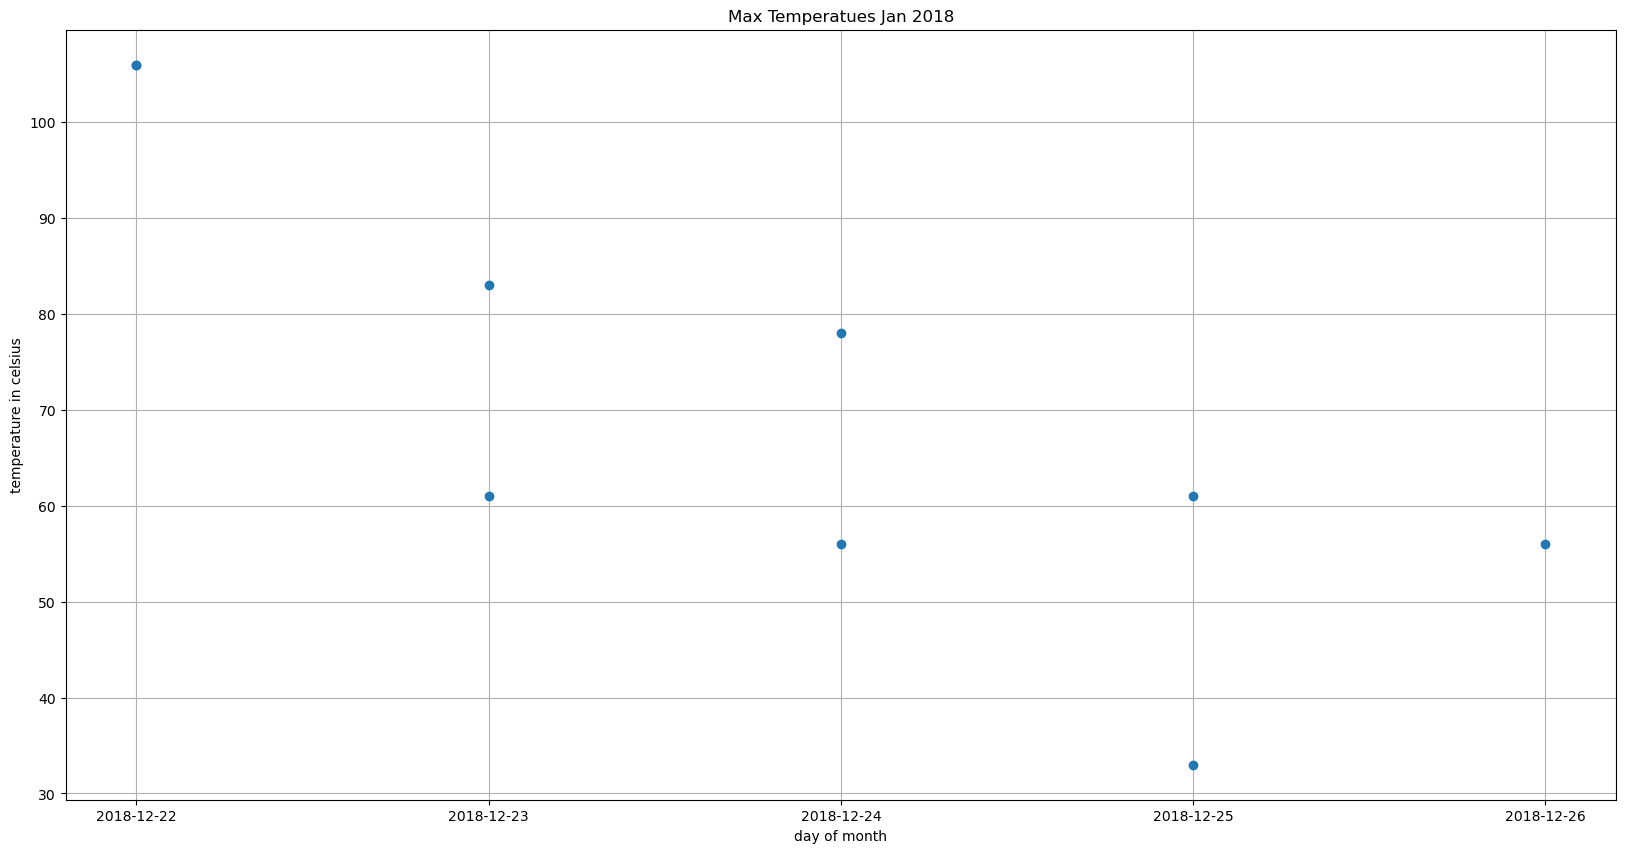

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y,)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [13]:
temps_min = df[df['datatype']=='TMIN']

In [14]:
temps_min = temps_min[temps_min.columns.drop(['station','attributes','datatype','source'])]

In [15]:
temps_min

,date,value
2,2018-12-21,94
37,2018-12-22,33
52,2018-12-22,44
87,2018-12-23,17
102,2018-12-23,11
...,...,...
1380,2018-12-19,-39
1395,2018-12-19,-55
1431,2018-12-20,-11
1445,2018-12-20,-32


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [16]:
temps_min.describe()

,date,value
count,62,62.000000
mean,2018-12-16 00:00:00,-3.903226
min,2018-12-01 00:00:00,-71.000000
25%,2018-12-08 06:00:00,-32.750000
50%,2018-12-16 00:00:00,-11.000000
75%,2018-12-23 18:00:00,22.000000
max,2018-12-31 00:00:00,94.000000
std,NaN,39.676854


Graph the temps_min DataFrame

In [17]:
min_x = temps_min['date'].astype(str)[1:10]
min_y = temps_min['value'][1:10]
max_x = temps_max['date'].astype(str)[1:10]
max_y = temps_max['value'][1:10]

We can also plot both of these lines in the same graph.

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min & Max Temperatues Jan 2018')]

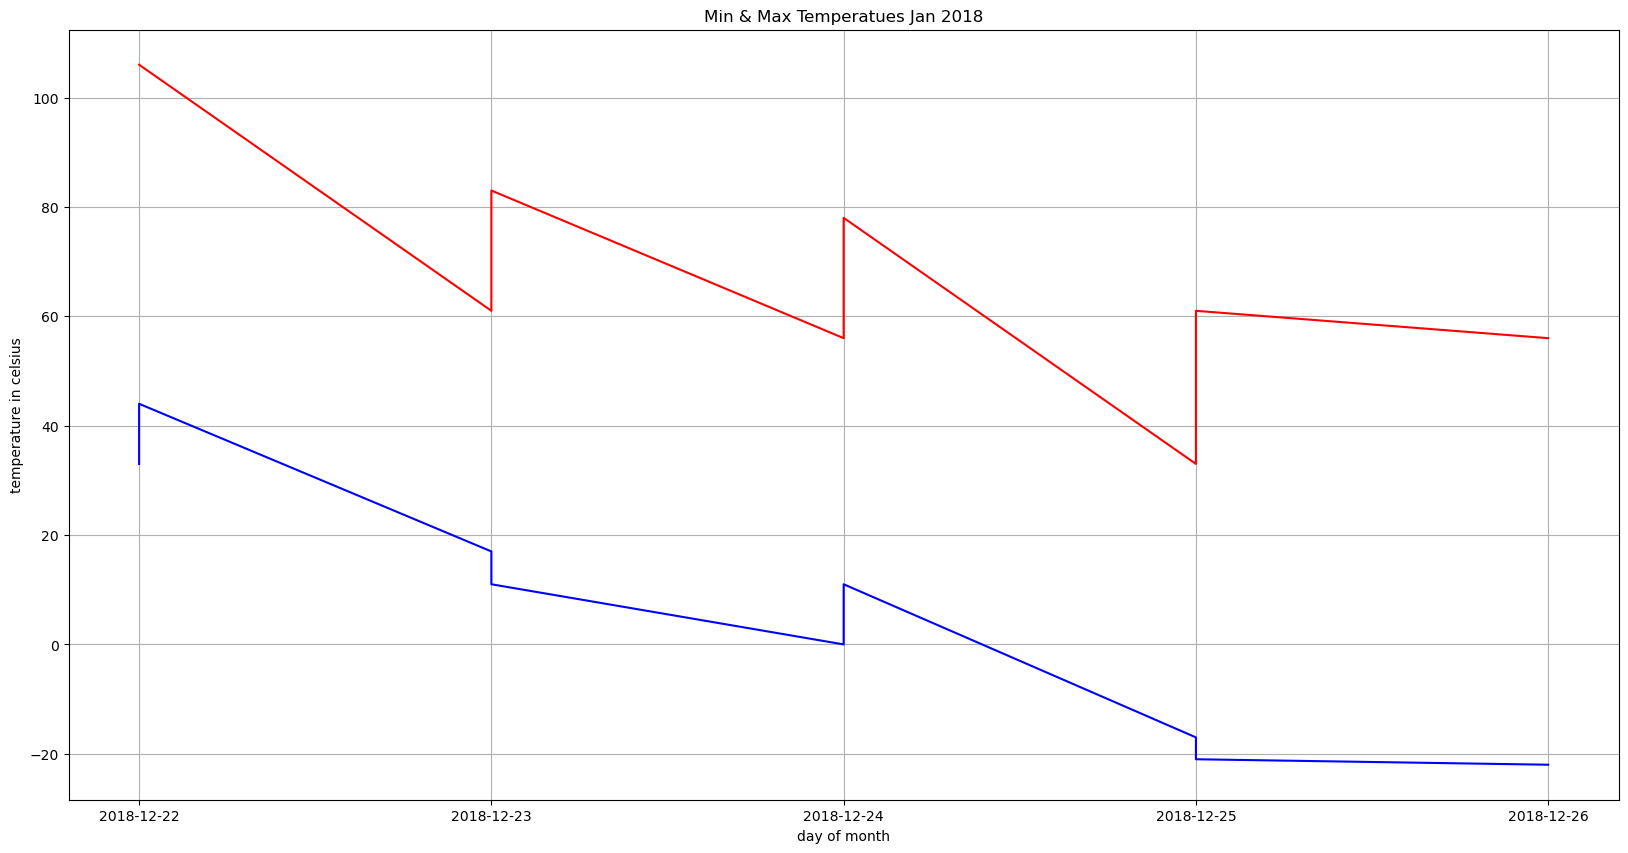

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(max_x, max_y, color='red')
ax.plot(min_x, min_y, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')